# Library

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, AveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
xray_directory='/content/drive/MyDrive/Datasets/Dataset'

In [4]:
os.listdir(xray_directory)

['.DS_Store', '1', '2', '3', '0']

In [5]:
image_generator = ImageDataGenerator(rescale=1./255)
train_generator = image_generator.flow_from_directory(batch_size = 40, directory=xray_directory,
                                                      shuffle = True, target_size=(256, 256),
                                                      class_mode = 'categorical', subset='training')
train_images, train_labels = next(train_generator)

Found 532 images belonging to 4 classes.


In [6]:
train_images.shape

(40, 256, 256, 3)

In [7]:
labels_names={0:'Covid-19',1:'Normal',2:'Pneumonia Viral',3:'Pneumonia Bacterial'}

In [8]:
train_labels

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]],

# Data visualization

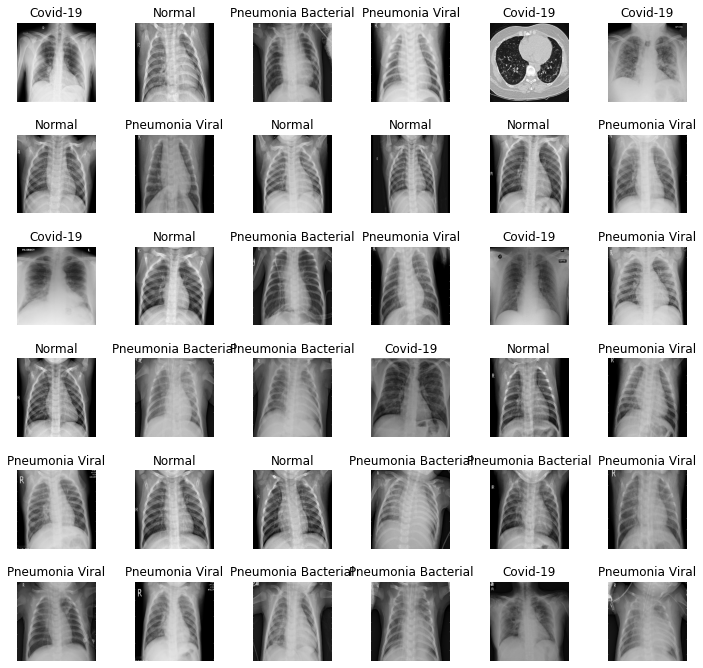

In [9]:
fig, axes=plt.subplots(6,6,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,36):
  axes[i].imshow(train_images[i]) 
  axes[i].set_title(labels_names[np.argmax(train_labels[i])])
  axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

base_model=ResNet50(weights='imaginet',include_top=

# Carregamento da rede neural com pesos pré-treinados

In [10]:
base_model=ResNet50(weights='imagenet',include_top=False, input_tensor=Input(shape=(256,256,3)))

94765736/94765736 [==============================] - 1s 0us/step


In [11]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [12]:
len(base_model.layers)

175

In [13]:
for layer in base_model.layers[:-10]:
  layers.trainable=False

# Construção e treinamento do modelo de deep learning

In [14]:
head_model=base_model.output
head_model=AveragePooling2D()(head_model)
head_model=Flatten()(head_model)
head_model=Dense(256,activation='relu')(head_model)
head_model=Dropout(0.2)(head_model)
head_model=Dense(128,activation='relu')(head_model)
head_model=Dropout(0.2)(head_model)
head_model=Dense(4,activation='softmax')(head_model)

In [15]:
model=Model(inputs=base_model.input, outputs=head_model) 

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer=optimizers.RMSprop(lr = 1e-4, decay=1e-6),
              metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
checkpointer=ModelCheckpoint(filepath='weights.hdf5')

In [18]:
train_generator = image_generator.flow_from_directory(batch_size = 4, directory=xray_directory,
                                                      shuffle = True, target_size=(256, 256),
                                                      class_mode = 'categorical', subset='training')

Found 532 images belonging to 4 classes.


In [19]:
history=model.fit_generator(train_generator, epochs=25,callbacks=[checkpointer])

<ipython-input-19-7a5f32860185>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator, epochs=25,callbacks=[checkpointer])


Epoch 1/25
133/133 [==============================] - 536s 4s/step - loss: 1.0426 - accuracy: 0.7218
Epoch 2/25
133/133 [==============================] - 522s 4s/step - loss: 0.5439 - accuracy: 0.8534
Epoch 3/25
133/133 [==============================] - 527s 4s/step - loss: 0.3773 - accuracy: 0.9023
Epoch 4/25
133/133 [==============================] - 527s 4s/step - loss: 0.3915 - accuracy: 0.9248
Epoch 5/25
133/133 [==============================] - 528s 4s/step - loss: 0.2876 - accuracy: 0.9455
Epoch 6/25
133/133 [==============================] - 524s 4s/step - loss: 0.2489 - accuracy: 0.9549
Epoch 7/25
133/133 [==============================] - 515s 4s/step - loss: 0.1809 - accuracy: 0.9756
Epoch 8/25
133/133 [==============================] - 521s 4s/step - loss: 0.1836 - accuracy: 0.9718
Epoch 9/25
133/133 [==============================] - 520s 4s/step - loss: 0.0848 - accuracy: 0.9887
Epoch 10/25
133/133 [==============================] - 518s 4s/step - loss: 0.2337 - accura

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

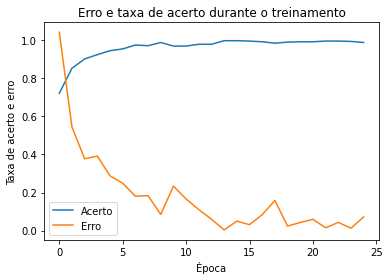

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Erro e taxa de acerto durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Taxa de acerto e erro')
plt.legend(['Acerto','Erro']);

In [27]:
test_directory='/content/drive/MyDrive/Datasets/Test'

In [28]:
test_gen=ImageDataGenerator(rescale=1./255)
test_generator=test_gen.flow_from_directory(batch_size=40,directory=test_directory,
                                            shuffle=True,target_size=(256,256),class_mode='categorical')

Found 40 images belonging to 4 classes.


In [29]:
evaluate=model.evaluate_generator(test_generator)

<ipython-input-29-d760178870a9>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate=model.evaluate_generator(test_generator)


In [30]:
evaluate

[3.4765963554382324, 0.824999988079071]

In [34]:
prediction=[]
original=[]
image=[]
for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory,str(i))):
    #print(os.listdir(os.path.join(test_directory,str(i))))
    img=cv2.imread(os.path.join(test_directory,str(i), item))
    img=cv2.resize(img,(256,256))
    image.append(img)
    img=img/255
    img=img.reshape(-1,256,256,3)
    predict=model.predict(img)
    predict=np.argmax(predict)
    prediction.append(predict)
    original.append(i)

1/1 [==============================] - 0s 271ms/step


In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

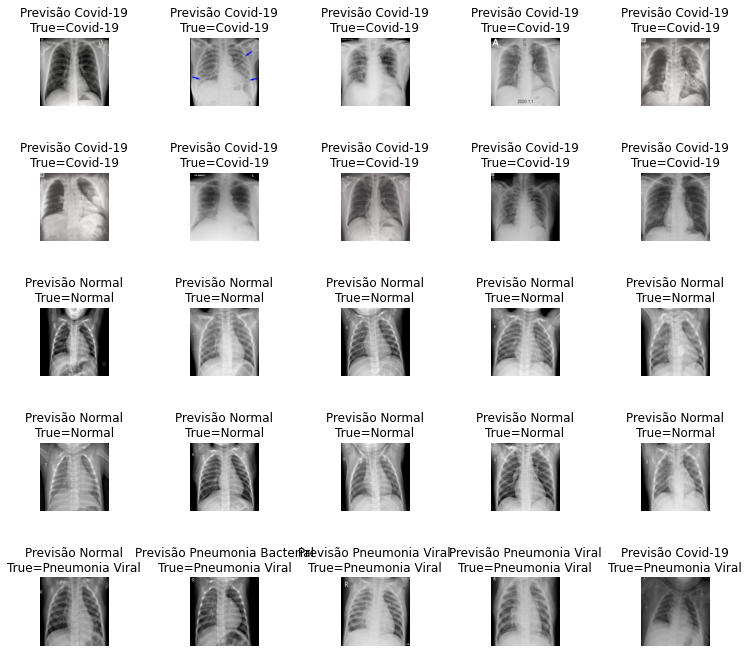

In [37]:
fig, axes=plt.subplots(5,5,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,25):
  axes[i].imshow(image[i])
  axes[i].set_title('Previsão {}\nTrue={}'.format(str(labels_names[prediction[i]]),str(labels_names[original[i]])))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1.2)

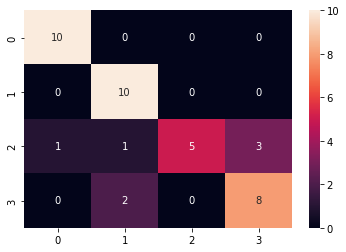

In [38]:
cm=confusion_matrix(original,prediction)
sns.heatmap(cm,annot=True);

In [39]:
print(classification_report(original, prediction))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.77      1.00      0.87        10
           2       1.00      0.50      0.67        10
           3       0.73      0.80      0.76        10

    accuracy                           0.82        40
   macro avg       0.85      0.82      0.81        40
weighted avg       0.85      0.82      0.81        40



In [40]:
from keras.models import load_model
model_loaded=load_model('/content/weights.hdf5')

In [42]:
model_loaded.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [43]:
img=cv2.imread('/content/drive/MyDrive/Datasets/Test/0/nCoV-radiol.2020200269.fig1-day7.jpeg')

In [44]:
img, img.shape

(array([[[ 15,  15,  15],
         [ 24,  24,  24],
         [ 27,  27,  27],
         ...,
         [ 23,  23,  23],
         [ 21,  21,  21],
         [ 19,  19,  19]],
 
        [[  5,   5,   5],
         [ 10,  10,  10],
         [ 12,  12,  12],
         ...,
         [  7,   7,   7],
         [  5,   5,   5],
         [  3,   3,   3]],
 
        [[  8,   8,   8],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [  4,   4,   4],
         [  3,   3,   3],
         [  1,   1,   1]],
 
        ...,
 
        [[ 17,  17,  17],
         [ 30,  30,  30],
         [ 45,  45,  45],
         ...,
         [100, 100, 100],
         [102, 102, 102],
         [105, 105, 105]],
 
        [[ 14,  14,  14],
         [ 25,  25,  25],
         [ 39,  39,  39],
         ...,
         [101, 101, 101],
         [103, 103, 103],
         [107, 107, 107]],
 
        [[ 13,  13,  13],
         [ 22,  22,  22],
         [ 35,  35,  35],
         ...,
         [105, 105, 105],
  

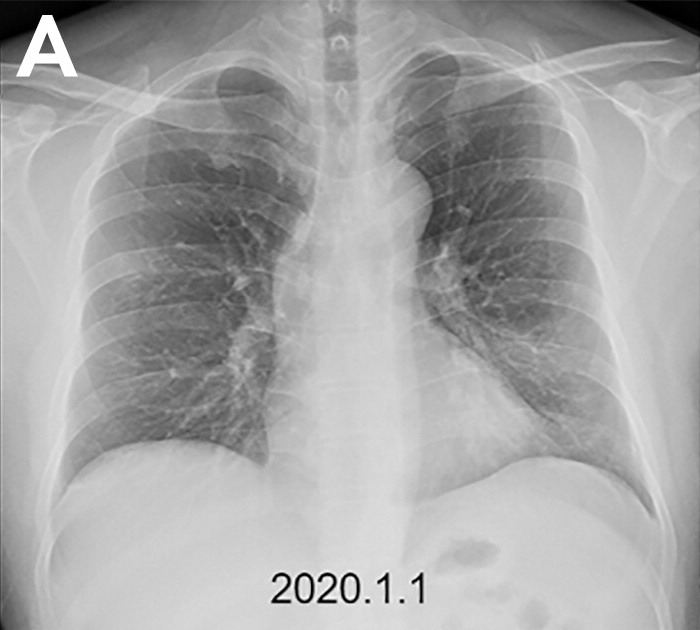

In [45]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

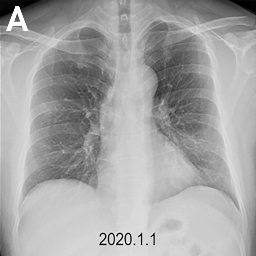

In [46]:
img=cv2.resize(img,(256,256))
cv2_imshow(img)

In [47]:
img=img/255
img

array([[[0.05098039, 0.05098039, 0.05098039],
        [0.04705882, 0.04705882, 0.04705882],
        [0.05882353, 0.05882353, 0.05882353],
        ...,
        [0.04313725, 0.04313725, 0.04313725],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03529412, 0.03529412, 0.03529412]],

       [[0.03529412, 0.03529412, 0.03529412],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01568627, 0.01568627, 0.01568627]],

       [[0.03529412, 0.03529412, 0.03529412],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.01960784, 0.01960784, 0.01960784],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01568627, 0.01568627, 0.01568627]],

       ...,

       [[0.18823529, 0.18823529, 0.18823529],
        [0.29019608, 0.29019608, 0.29019608],
        [0.3372549 , 0

In [48]:
img=img.reshape(-1,256,256,3)
img.shape

(1, 256, 256, 3)

In [49]:
predict=model_loaded(img)
predict

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[1., 0., 0., 0.]], dtype=float32)>

In [50]:
predict=np.argmax(predict)
predict

0

In [51]:
labels_names[predict]

'Covid-19'